In [57]:
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import networkx as nx
import heapq
from collections import OrderedDict

In [2]:
data_split = pkl.load(open('splits_slope_0.0001_version_1.p', 'rb'))

data_segment = pkl.load(open('segments_slope_0.0001_version_1.p', 'rb'))

for k, v in data_segment.items():
    data_segment[k] = len(v)
split_dict = {}
for k, v in data_split.items():
    split_dict[int(k)] = (int(v[0]), int(v[1]))

In [4]:
labels = OrderedDict()
values = range(len(data_segment))
for e, i in enumerate(values):
    labels[str(e)] = i

In [54]:
g= nx.DiGraph(split_dict)
edgie = g.edges()
for k, v in split_dict.items():
    for ed in edgie:
        if k == ed[0]:
            g[k][ed[1]]['weights'] = data_segment[k] * 1/len(data_segment)

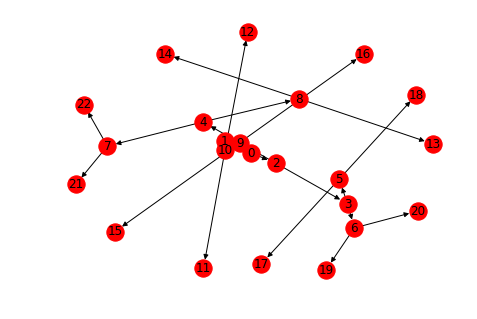

In [65]:
plt.figure()
nx.draw(g, with_labels=labels)
plt.savefig('test.png', dpi=300)
plt.show()

In [6]:
def calc_order_array(D):
    
    if nx.is_directed_acyclic_graph(D) == False:
        raise('Input should be a directed acyclic graph sukkel')

    order_array = np.zeros(nx.number_of_nodes(D))

    for i in range(nx.number_of_nodes(D)-1,-1,-1):
        if len(nx.descendants(D,i)) == 0 or len(nx.descendants(D,i)) == 1:
            order_array[i] = 1
        else:
            des_list = list(D.successors(i))
            des_list = [int(h) for h in des_list]
            max_orders = heapq.nlargest(2, order_array[des_list])            
         
            if len(max_orders) == 1:
                order_array[i] = max_orders[0]
                  
            else:

                if max_orders[0] == max_orders[1]:
                    order_array[i] = max_orders[0] + 1
                else:
                    order_array[i] = max_orders[0]
    return order_array

In [7]:
def calc_bifcation_ratio(order_arr):
    
    if len(order_arr) < 1.0:
        R_b = 0
    else:
        R_i = int(max(order_arr) - 1)
        R_b = np.zeros(R_i)
        
        for i in range(R_i):
#             print("Test ",i , " ", order_arr == i + 1)
            R_b[i] = sum(order_arr == i + 1)/sum(order_arr == i + 2)
    return R_b

In [8]:
o_array = calc_order_array(g)

In [27]:
r_b = calc_bifcation_ratio(o_array)

In [44]:
def calc_len_ratio(order_arr, segm_dict):
    
    length_node_list = segm_dict.values()
    length_order_set_list = list(zip(order_arr, length_node_list))

    R_l = []
    avg_len_path_dict = {}
    
    for order, length in length_order_set_list:
        if order not in avg_len_path_dict:
            avg_len_path_dict[order] = [length]
        else:
            avg_len_path_dict[order].append(length)
    
    for key, value in avg_len_path_dict.items():
        avg_len_path_dict[key] = sum(value)/len(value)
        
    for i in range(1, len(avg_len_path_dict)):
        R_l.append(avg_len_path_dict[i + 1]/avg_len_path_dict[i])
    return R_l

In [45]:
r_l = calc_len_ratio(o_array, data_segment)

In [50]:
def calc_fractal_dim(ratio_bifcation, ratio_length):
    return sum(np.log(ratio_bifcation)/np.log(ratio_length))

slopes = [0.0001,0.0002,0.0004,0.0006,0.0008,0.001]
rb=np.zeros(30,3)
for i in range(1,31):
    count = 0
    for s in slopes:
        count += 1
        name = ('splits_slope_' + str(s) +'version' + str(i) +'.p')
        data_split = pkl.load(open(name, 'rb'))
        Graph = nx.DiGraph(data_split) 
        ##rb[count] = calc_Rb(Graph)[0]

In [ ]:
def stats_bif():
    pass
def stats_path():
    pass
def stats_frac_dim():
    pass